In [1]:
#import  libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
#shape of the data
df.shape

(25480, 12)

In [4]:
# different types of coloumns 
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
#infomation about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
# check the null values
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [7]:
# description of numerical columns
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [8]:
#separation of the numerical columns and categorical columns
numerical_features=[feature  for feature in df.columns if df[feature].dtype !='O']
categorial_fearues=[feature  for feature in df.columns if df[feature].dtype =='O']

In [9]:
numerical_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [10]:
categorial_fearues

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [11]:
df['education_of_employee'].value_counts()

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

<Axes: >

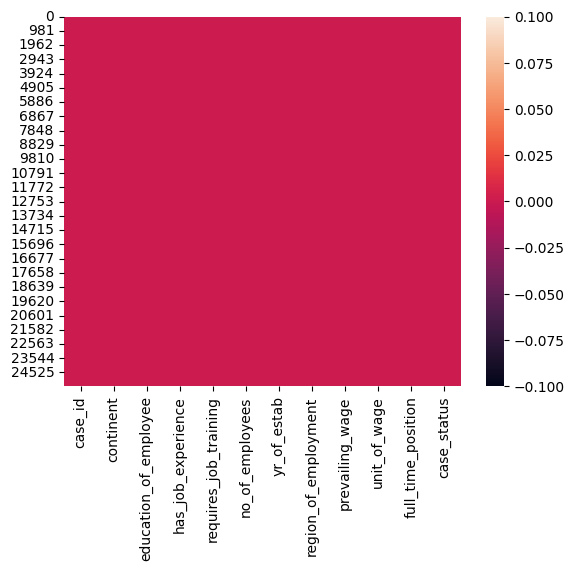

In [12]:
#checking the null values using heatmap
sns.heatmap(df.isnull())

In [13]:
#get the percentage in eduction of employees columns
df['education_of_employee'].value_counts(normalize=True)*100

Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: education_of_employee, dtype: float64

In [14]:
# find the percentage of each values
for col in categorial_fearues:
    print(df[col].value_counts(normalize=True)*100)
    print('.........................................................')
    

EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: case_id, Length: 25480, dtype: float64
.........................................................
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: continent, dtype: float64
.........................................................
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: education_of_employee, dtype: float64
.........................................................
Y    58.092622
N    41.907378
Name: has_job_experience, dtype: float64
.........................................................
N    88.402669
Y    11.597331
Name: requires_job_training, dtype: float6

In [15]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [16]:
df.drop(columns=['case_id'],inplace=True)

In [17]:
## drop case_id because case_id is not important 
categorial_fearues.remove('case_id')

In [18]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Exploratory Data Analysis

In [19]:
##Univeriant Analysis Numerical fearute
numerical_features 

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

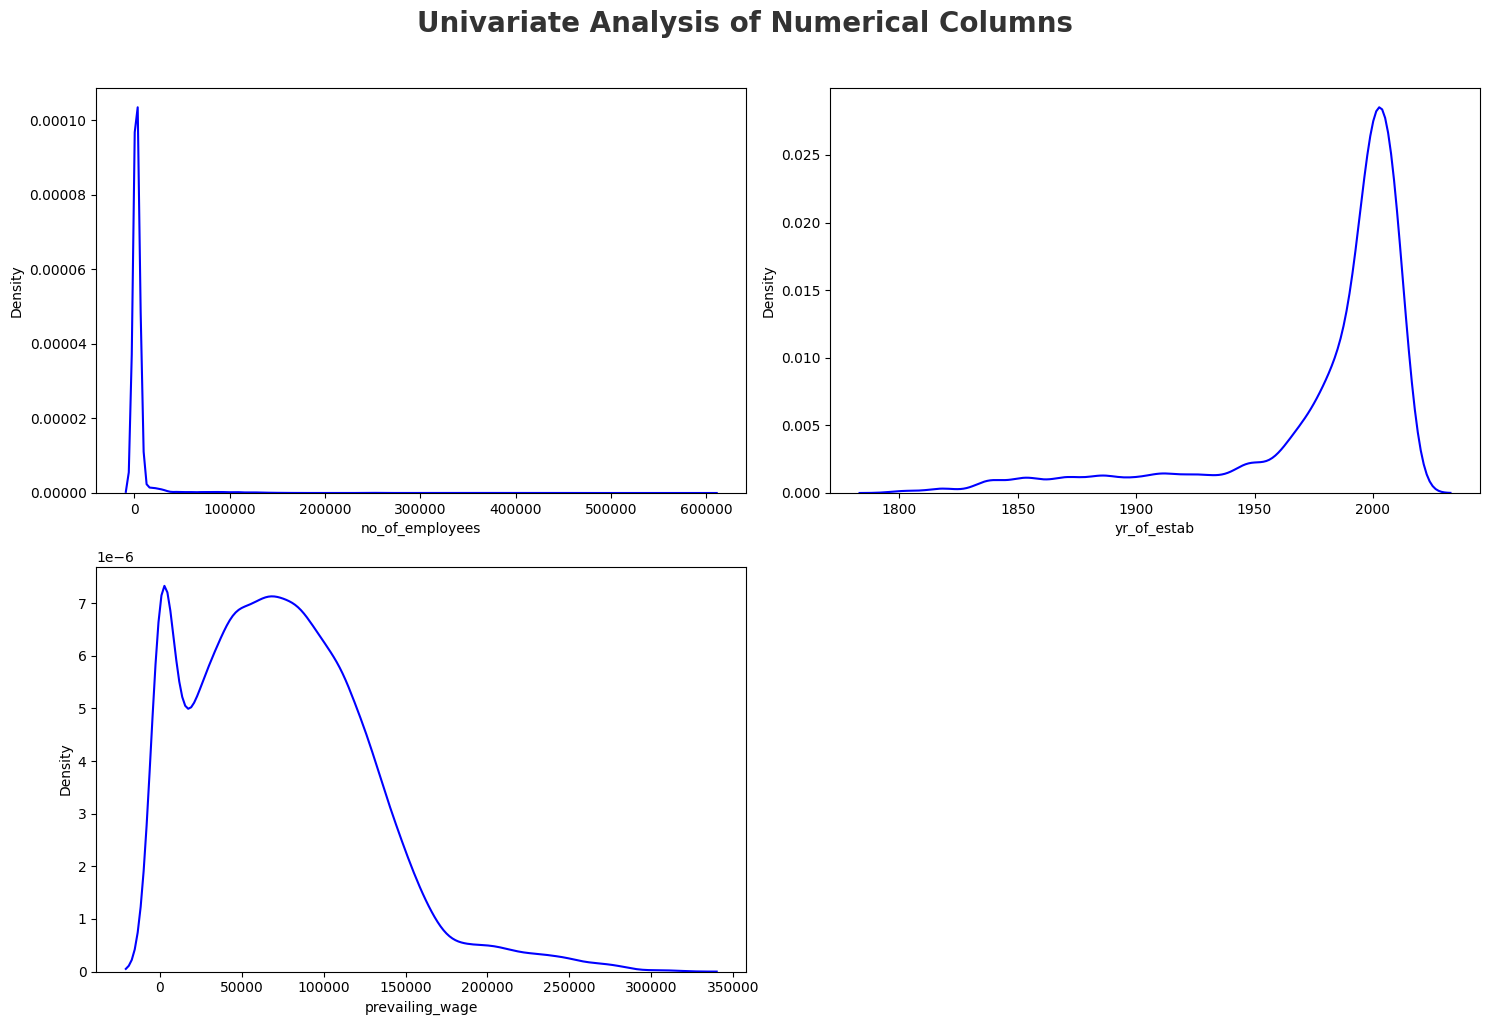

In [20]:
plt.figure(figsize=(15, 10))
plt.suptitle("Univariate Analysis of Numerical Columns", fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(len(numerical_features)):
    plt.subplot(2, 2, i + 1)  # Ensure grid is sufficient for number of plots
    sns.kdeplot(x=df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])  # Corrected method name
    plt.tight_layout()

plt.show()

In [21]:
categorial_fearues

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

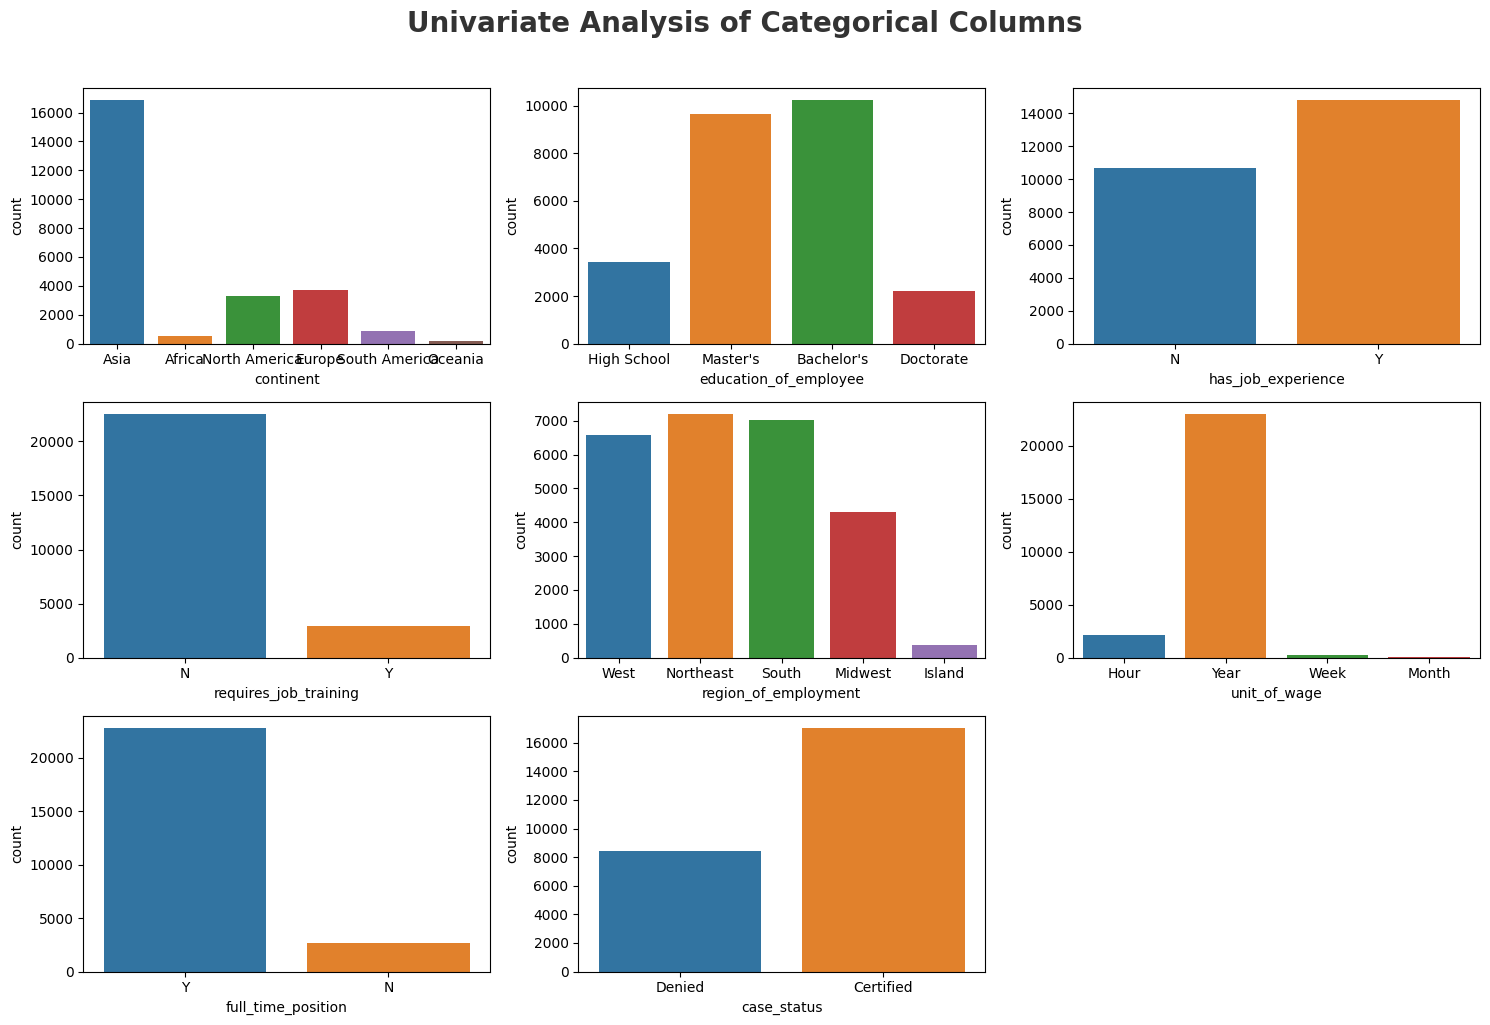

In [22]:
plt.figure(figsize=(15, 10))
plt.suptitle("Univariate Analysis of Categorical Columns", fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(len(categorial_fearues)):
    plt.subplot(3, 3, i + 1)  # Ensure grid is sufficient for number of plots
    sns.countplot(x=df[categorial_fearues[i]])
    plt.xlabel(categorial_fearues[i])  # Corrected method name
    plt.tight_layout()

plt.show()

In [23]:
## multivariant Analysis
discreate_features=[feature for feature in numerical_features if len(df[feature].unique())<=25]

continues_feature=[feature for feature in numerical_features if len(df[feature].unique())>=25]


In [24]:
discreate_features

[]

In [25]:
continues_feature

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [26]:
df[(list(df.columns)[1:])].corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


<Axes: >

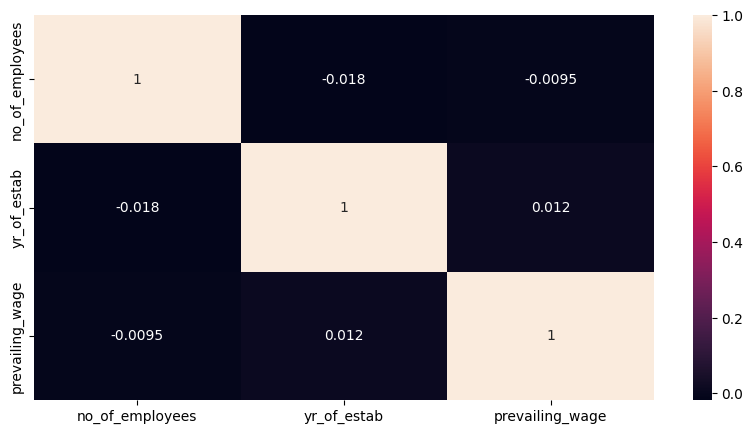

In [27]:
df1=df.copy()
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True)

In [28]:
from scipy.stats import chi2_contingency
chi2_test=[]

for feature in categorial_fearues:
    if chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1]<0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")

result = pd.DataFrame(data=[categorial_fearues,chi2_test]).T
result.columns=["Column","Hypothesis"]
result            

,Column,Hypothesis
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


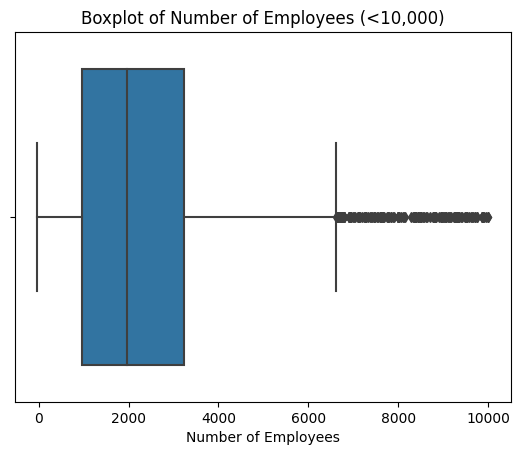

In [29]:
sns.boxplot(x=df[df['no_of_employees'] < 10000]['no_of_employees'])
plt.xlabel("Number of Employees")  # Label for x-axis
plt.title("Boxplot of Number of Employees (<10,000)")  # Adding a title
plt.show()

In [30]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


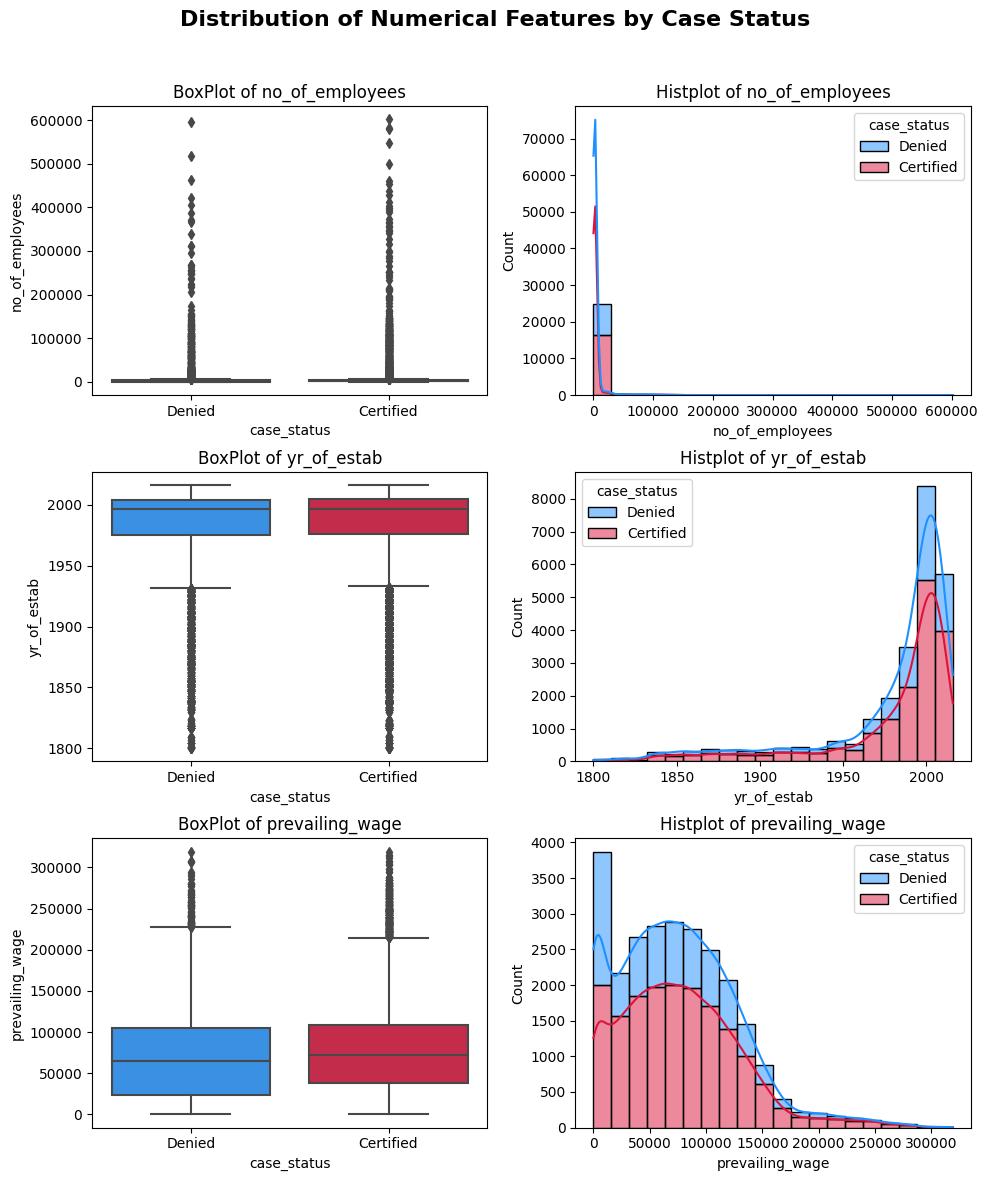

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10, 12))  # Create 3x2 subplots
fig.suptitle('Distribution of Numerical Features by Case Status', fontsize=16, fontweight='bold')

for i, col in enumerate(continues_feature):
    sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f'BoxPlot of {col}', fontsize=12)
    
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histplot of {col}', fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()


In [32]:
percentage = df.case_status.value_counts(normalize=True)*100
percentage

Certified    66.789639
Denied       33.210361
Name: case_status, dtype: float64

([<matplotlib.patches.Wedge at 0x2c017119950>,
 [Text(-0.9504959274724624, -0.553676342151499, 'Certified'),
  Text(1.0369045350486599, 0.604010749238391, 'Denied')],
 [Text(-0.5184523240758885, -0.30200527753718126, '66.79%'),
  Text(0.604860978778385, 0.3523396037223947, '33.21%')])

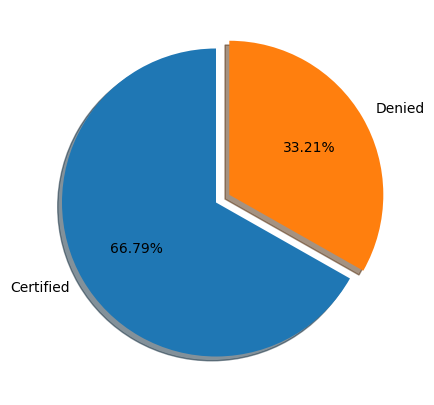

In [33]:
# Visualized the taget Feature


fig,ax = plt.subplots(figsize=(15,5))
explore=(0,0.1)
ax.pie(percentage,labels=['Certified','Denied'],startangle=90,autopct='%1.2f%%',explode=explore,shadow=True)

In [34]:
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

case_status
continent     case_status             
Africa        Certified      72.050817
              Denied         27.949183
Asia          Certified      65.310480
              Denied         34.689520
Europe        Certified      79.233655
              Denied         20.766345
North America Certified      61.877278
              Denied         38.122722
Oceania       Certified      63.541667
              Denied         36.458333
South America Certified      57.863850
              Denied         42.136150

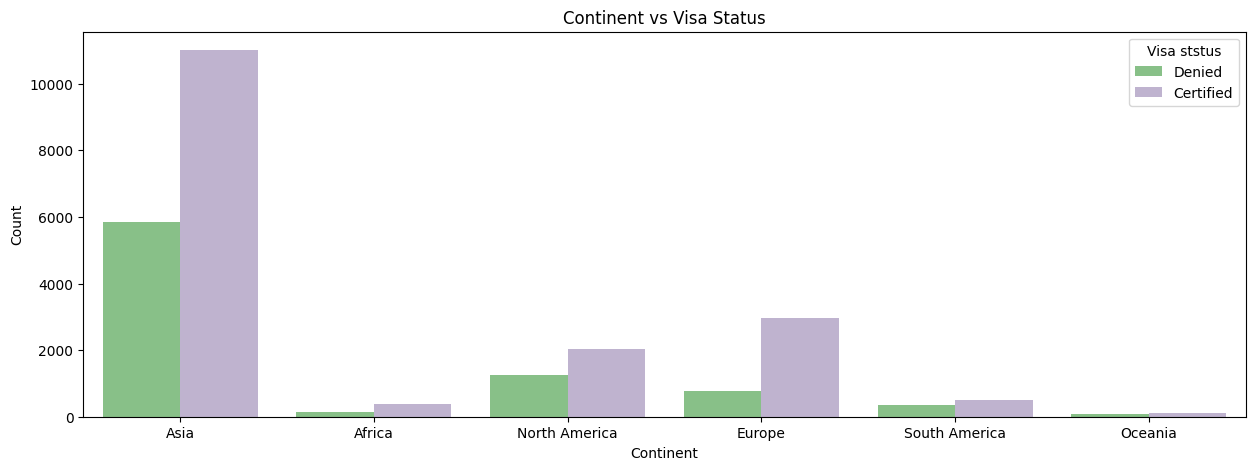

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='continent',hue='case_status',palette='Accent')
plt.title("Continent vs Visa Status")
plt.ylabel("Count")
plt.xlabel('Continent')
plt.legend(title='Visa ststus')
plt.show()

In [36]:
df2=df.copy()
df2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


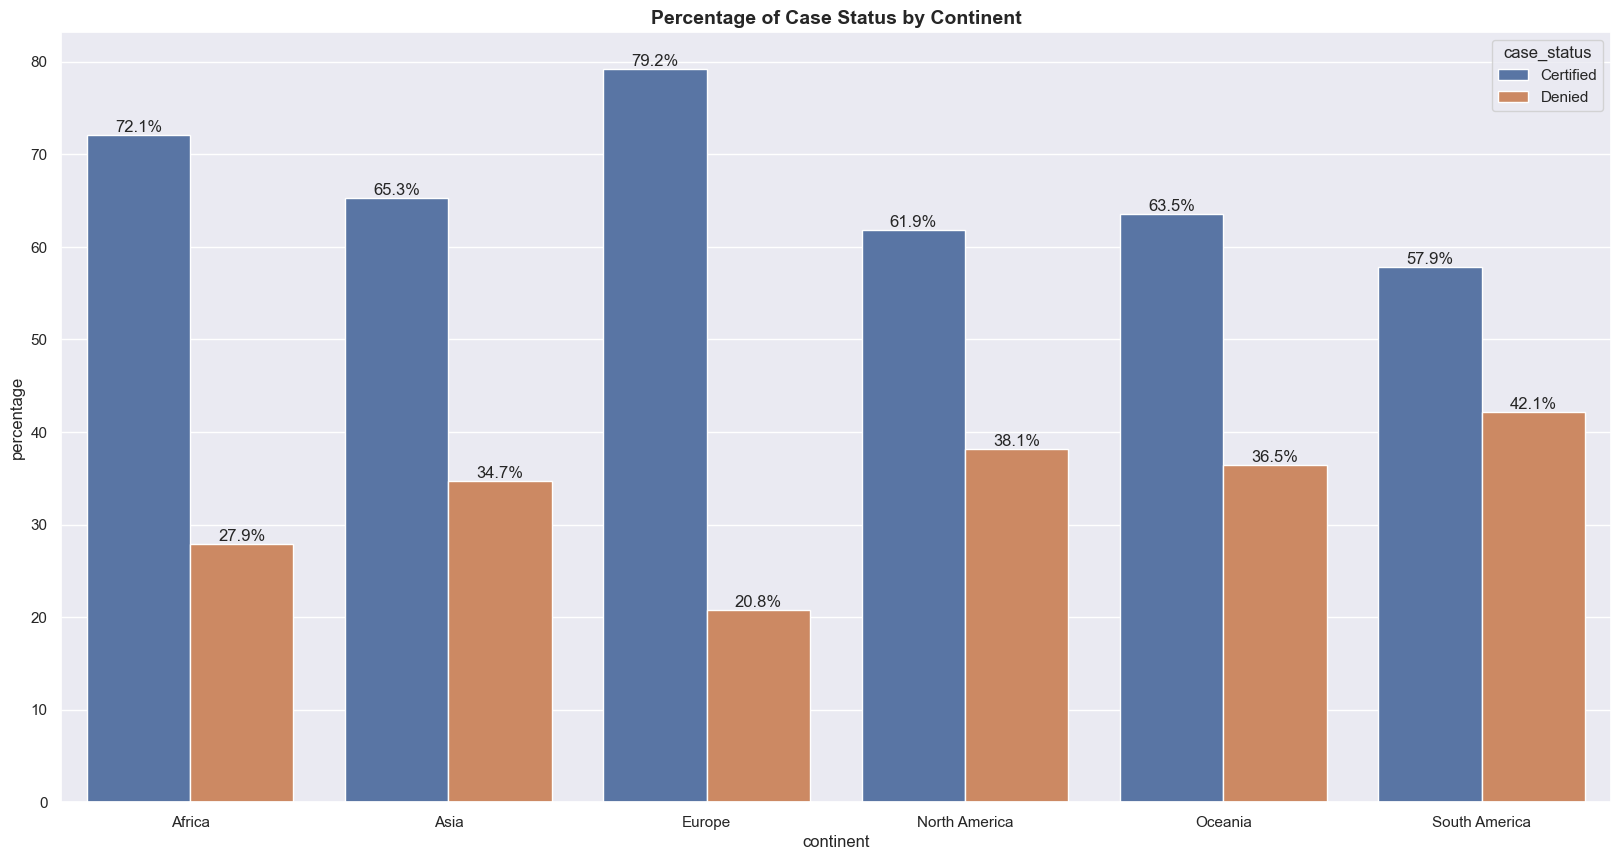

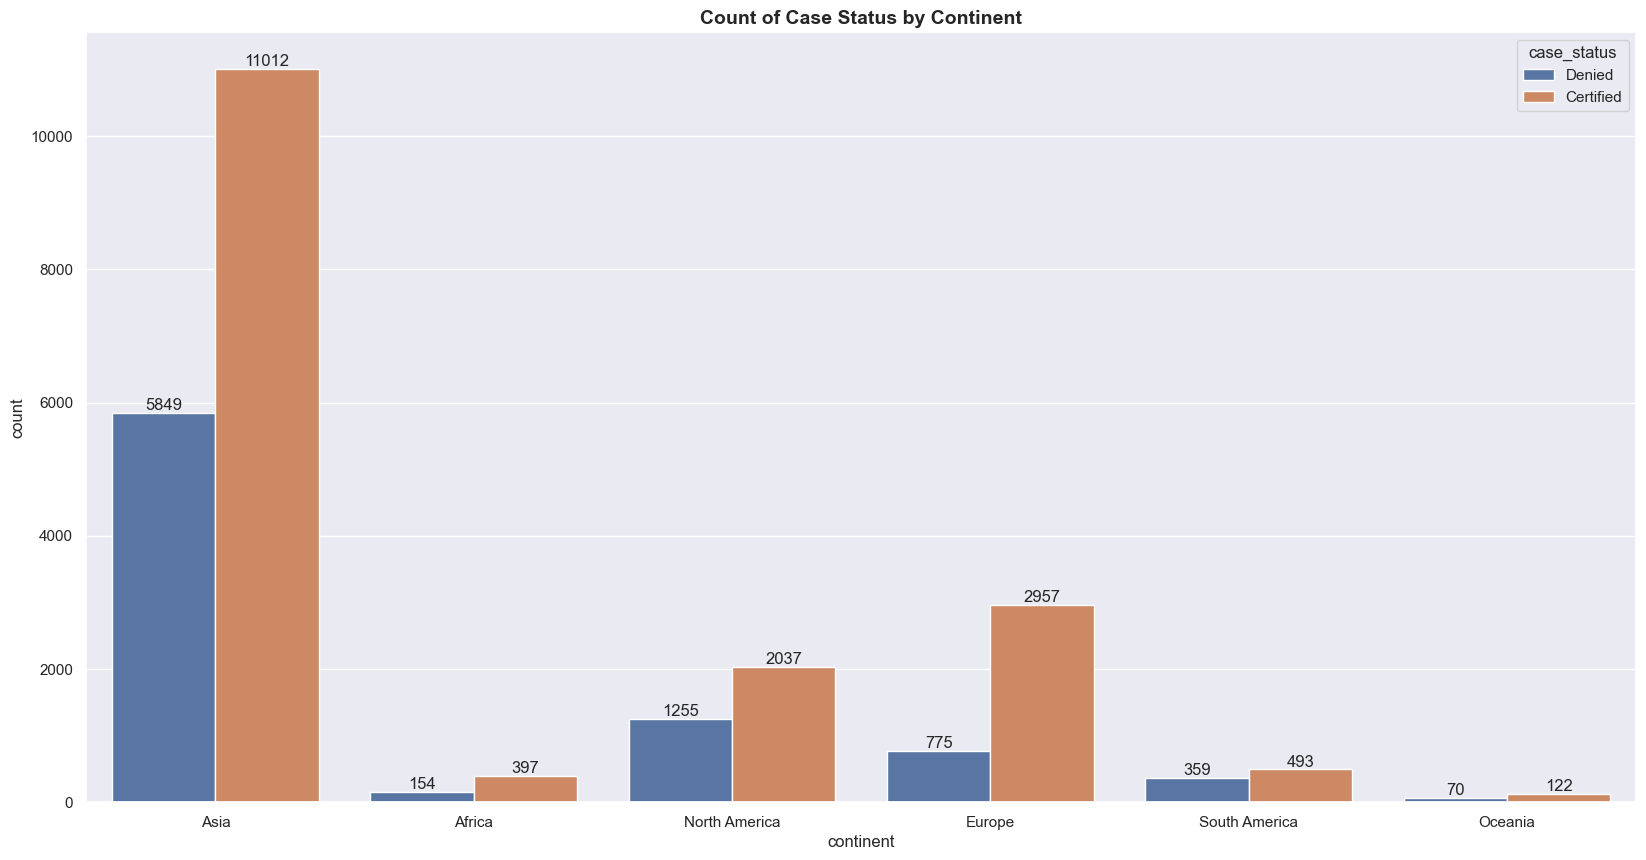

In [37]:
# Calculate percentage of case_status per continent
percentage = df.groupby('continent')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

# Set figure size
sns.set(rc={'figure.figsize': (20, 10)})

# Bar plot for percentage of case_status by continent
ax1 = sns.barplot(data=percentage, x='continent', y='percentage', hue='case_status')
plt.title('Percentage of Case Status by Continent', fontsize=14, fontweight='bold')

# Add value labels
for bars in ax1.containers:
    ax1.bar_label(bars, fmt="%.1f%%")  # Show percentages

plt.show()

# Count plot for raw case counts
plt.figure(figsize=(20, 10))
ax2 = sns.countplot(data=df, x='continent', hue='case_status')
plt.title('Count of Case Status by Continent', fontsize=14, fontweight='bold')

# Add count labels
for bars in ax2.containers:
    ax2.bar_label(bars)

plt.show()


In [38]:
percentage = df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
percentage

,education_of_employee,case_status,percentage
0,Bachelor's,Certified,62.214188
1,Bachelor's,Denied,37.785812
2,Doctorate,Certified,87.226277
3,Doctorate,Denied,12.773723
4,High School,Denied,65.964912
5,High School,Certified,34.035088
6,Master's,Certified,78.627777
7,Master's,Denied,21.372223


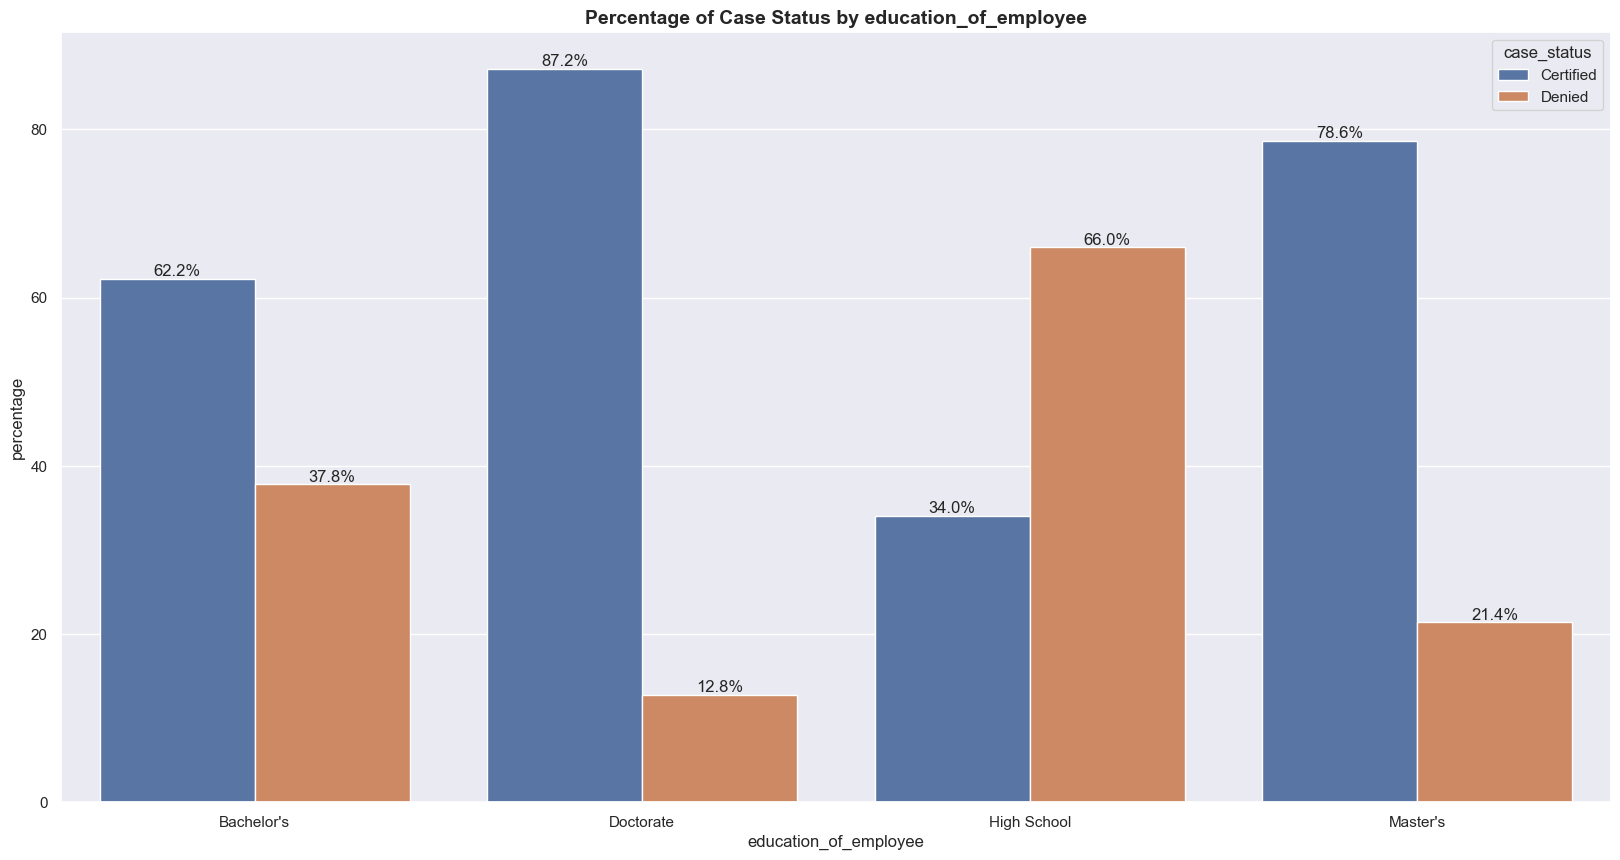

In [39]:
# Calculate percentage of case_status per education_of_employee
percentage = df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

# Set figure size
sns.set(rc={'figure.figsize': (20, 10)})

# Bar plot for percentage of case_status by education_of_employee
ax1 = sns.barplot(data=percentage, x='education_of_employee', y='percentage', hue='case_status')
plt.title('Percentage of Case Status by education_of_employee', fontsize=14, fontweight='bold')

# Add value labels
for bars in ax1.containers:
    ax1.bar_label(bars, fmt="%.1f%%")  # Show percentages

plt.show()

# Count plot for raw case counts
# plt.figure(figsize=(20, 10))
# ax2 = sns.countplot(data=df, x='education_of_employee', hue='case_status')
# plt.title('Count of Case Status by education_of_employee', fontsize=14, fontweight='bold')

# # Add count labels
# for bars in ax2.containers:
#     ax2.bar_label(bars)

# plt.show()


In [40]:
# Calculate percentage of case_status per has_job_experience
percentage = df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
percentage

,has_job_experience,case_status,percentage
0,N,Certified,56.134108
1,N,Denied,43.865892
2,Y,Certified,74.476422
3,Y,Denied,25.523578


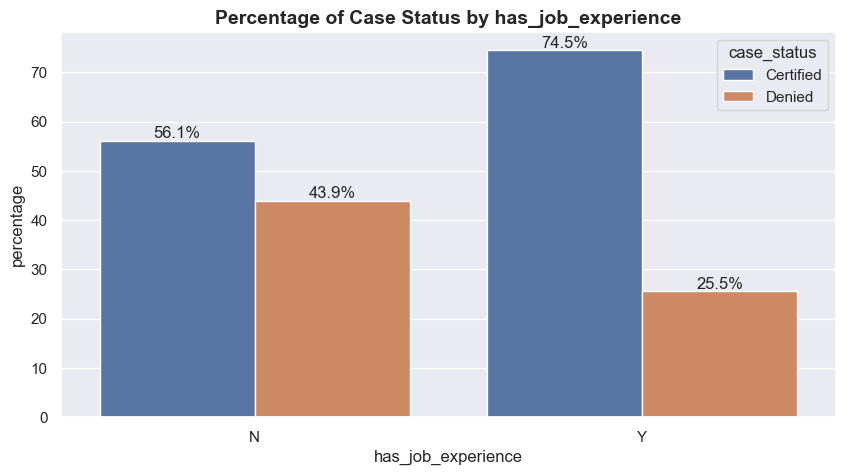

In [41]:

# Set figure size
sns.set(rc={'figure.figsize': (10, 5)})

# Bar plot for percentage of case_status by has_job_experience
ax1 = sns.barplot(data=percentage, x='has_job_experience', y='percentage', hue='case_status')
plt.title('Percentage of Case Status by has_job_experience', fontsize=14, fontweight='bold')

# Add value labels
for bars in ax1.containers:
    ax1.bar_label(bars, fmt="%.1f%%")  # Show percentages

plt.show()

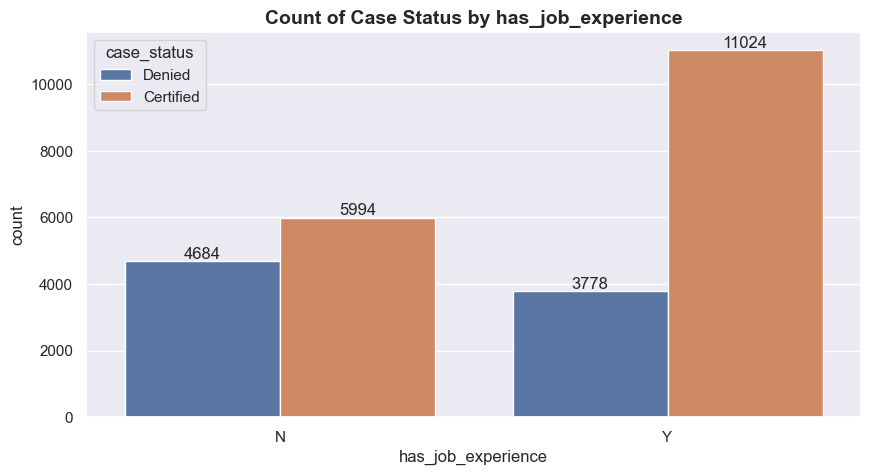

In [42]:
#Count plot for raw case counts
plt.figure(figsize=(10, 5))
ax2 = sns.countplot(data=df, x='has_job_experience', hue='case_status')
plt.title('Count of Case Status by has_job_experience', fontsize=14, fontweight='bold')

# Add count labels
for bars in ax2.containers:
    ax2.bar_label(bars)

plt.show()

In [43]:
# Calculate percentage of case_status per requires_job_training
percentage = df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
percentage

,requires_job_training,case_status,percentage
0,N,Certified,66.645949
1,N,Denied,33.354051
2,Y,Certified,67.884941
3,Y,Denied,32.115059


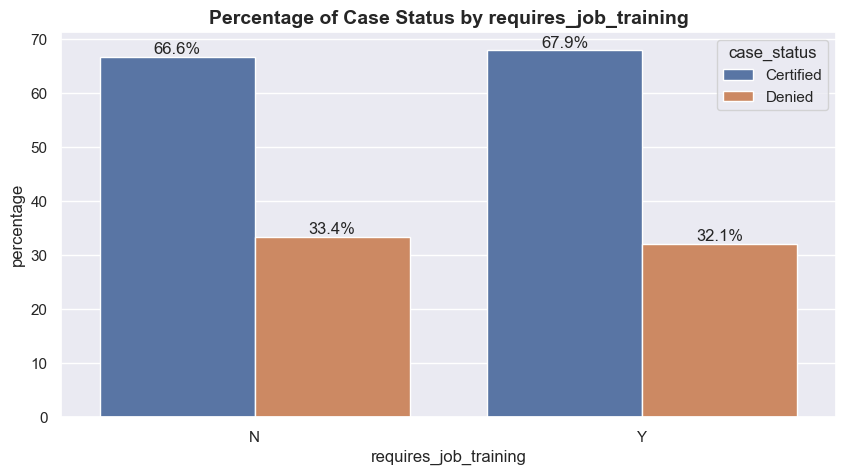

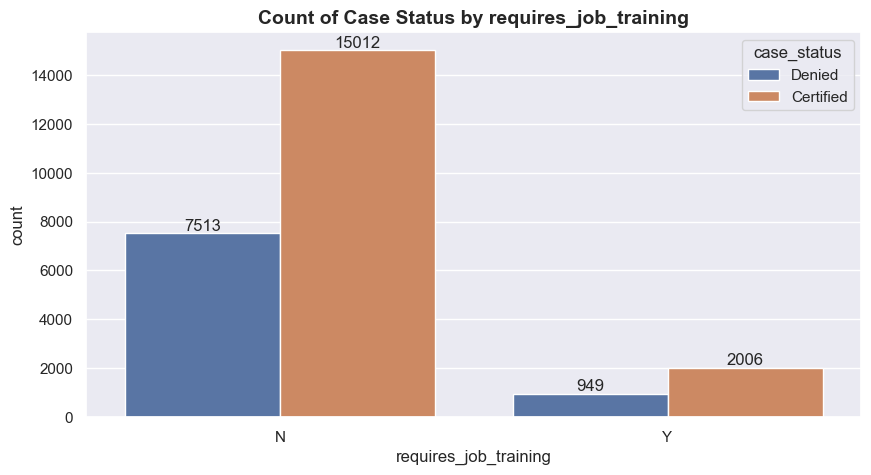

In [44]:

# Set figure size
sns.set(rc={'figure.figsize': (10, 5)})

# Bar plot for percentage of case_status by requires_job_training
ax1 = sns.barplot(data=percentage, x='requires_job_training', y='percentage', hue='case_status')
plt.title('Percentage of Case Status by requires_job_training', fontsize=14, fontweight='bold')

# Add value labels
for bars in ax1.containers:
    ax1.bar_label(bars, fmt="%.1f%%")  # Show percentages

plt.show()

# Count plot for raw case counts
plt.figure(figsize=(10, 5))
ax2 = sns.countplot(data=df, x='requires_job_training', hue='case_status')
plt.title('Count of Case Status by requires_job_training', fontsize=14, fontweight='bold')

# Add count labels
for bars in ax2.containers:
    ax2.bar_label(bars)

plt.show()


In [45]:
df2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


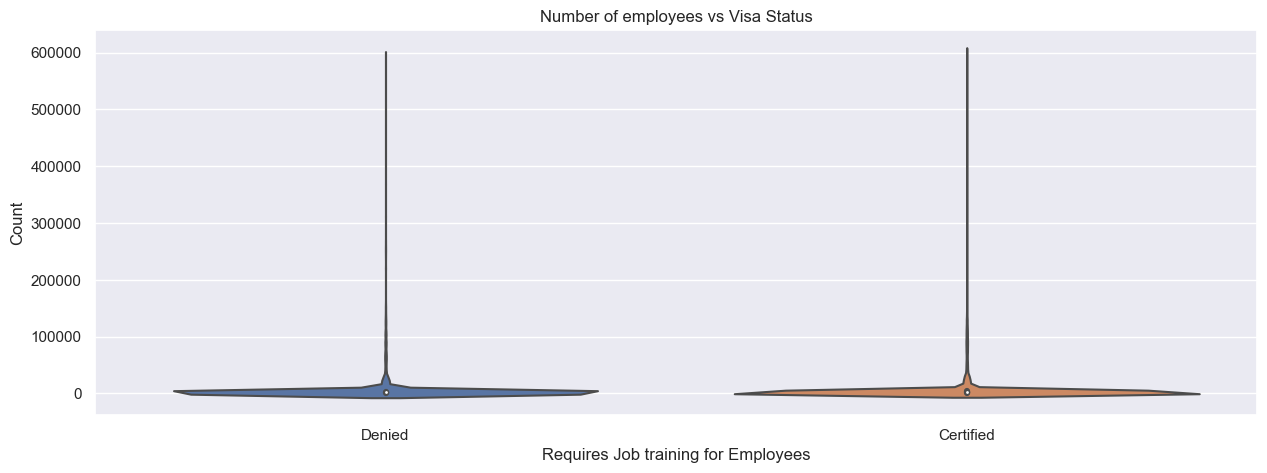

In [46]:
plt.figure(figsize=(15,5))
sns.violinplot(x='case_status',y='no_of_employees',data=df,paletter='Accent')
plt.title("Number of employees vs Visa Status")
plt.ylabel("Count")
plt.xlabel("Requires Job training for Employees")
plt.show()

In [47]:
df2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [48]:
percentage = df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
percentage

,unit_of_wage,case_status,percentage
0,Hour,Denied,65.368567
1,Hour,Certified,34.631433
2,Month,Certified,61.797753
3,Month,Denied,38.202247
4,Week,Certified,62.132353
5,Week,Denied,37.867647
6,Year,Certified,69.885027
7,Year,Denied,30.114973


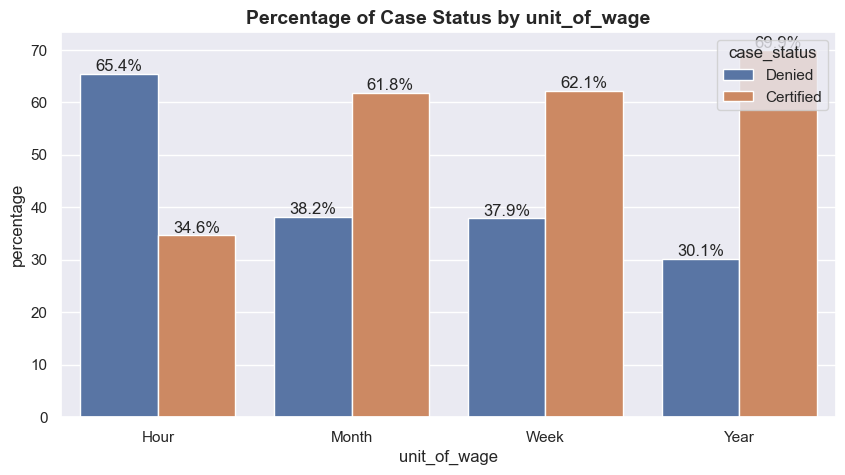

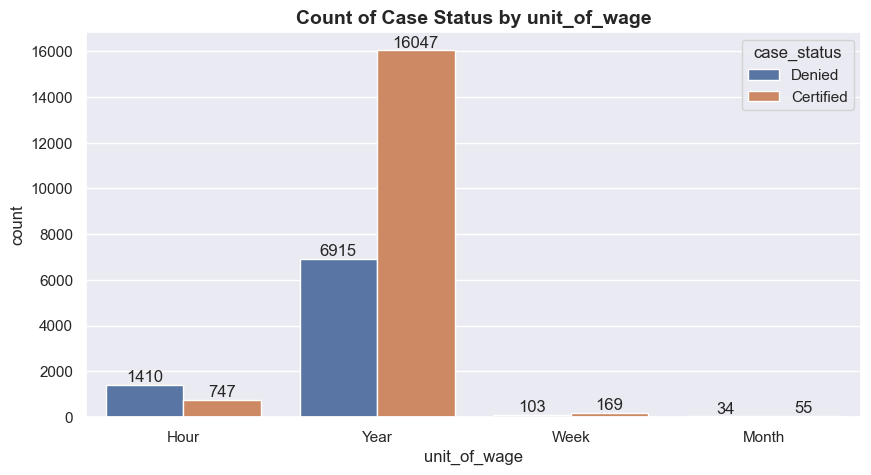

In [49]:

# Set figure size
sns.set(rc={'figure.figsize': (10, 5)})

# Bar plot for percentage of case_status by unit_of_wage
ax1 = sns.barplot(data=percentage, x='unit_of_wage', y='percentage', hue='case_status')
plt.title('Percentage of Case Status by unit_of_wage', fontsize=14, fontweight='bold')

# Add value labels
for bars in ax1.containers:
    ax1.bar_label(bars, fmt="%.1f%%")  # Show percentages

plt.show()

# Count plot for raw case counts
plt.figure(figsize=(10, 5))
ax2 = sns.countplot(data=df, x='unit_of_wage', hue='case_status')
plt.title('Count of Case Status by unit_of_wage', fontsize=14, fontweight='bold')

# Add count labels
for bars in ax2.containers:
    ax2.bar_label(bars)

plt.show()


In [50]:
df2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [51]:
percentage = df.groupby('region_of_employment')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
percentage

,region_of_employment,case_status,percentage
0,Island,Certified,60.266667
1,Island,Denied,39.733333
2,Midwest,Certified,75.528210
3,Midwest,Denied,24.471790
4,Northeast,Certified,62.904795
5,Northeast,Denied,37.095205
6,South,Certified,70.015676
7,South,Denied,29.984324
8,West,Certified,62.253265
9,West,Denied,37.746735


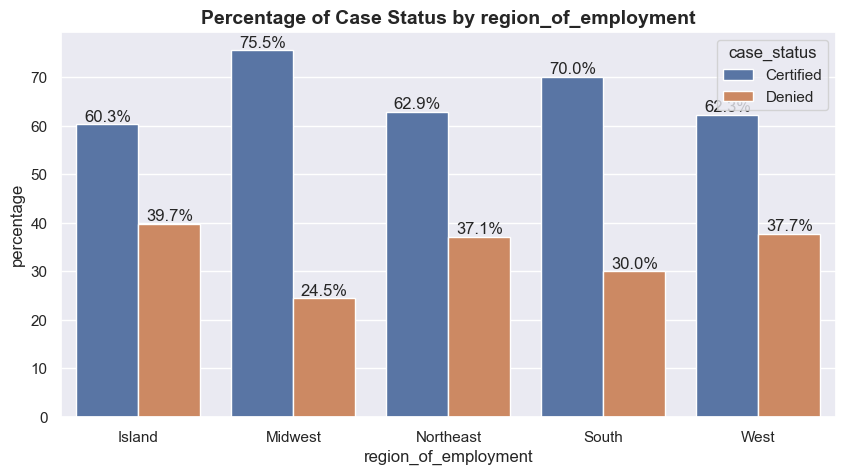

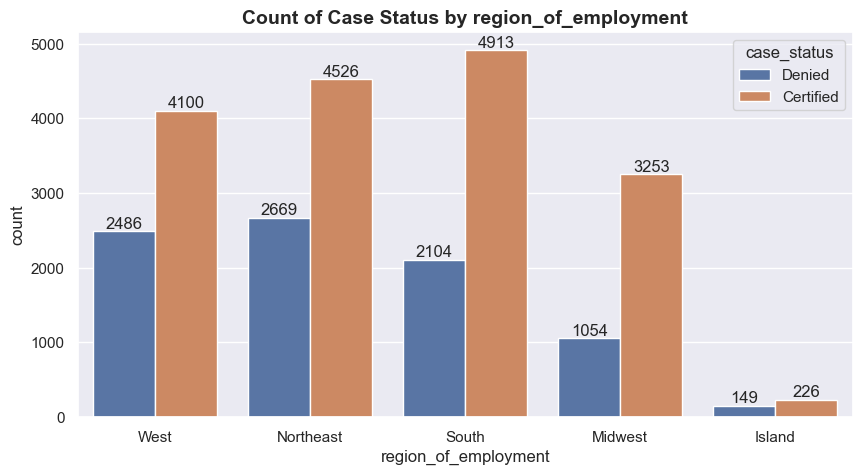

In [52]:

# Set figure size
sns.set(rc={'figure.figsize': (10, 5)})

# Bar plot for percentage of case_status by region_of_employment
ax1 = sns.barplot(data=percentage, x='region_of_employment', y='percentage', hue='case_status')
plt.title('Percentage of Case Status by region_of_employment', fontsize=14, fontweight='bold')

# Add value labels
for bars in ax1.containers:
    ax1.bar_label(bars, fmt="%.1f%%")  # Show percentages

plt.show()

# Count plot for raw case counts
plt.figure(figsize=(10, 5))
ax2 = sns.countplot(data=df, x='region_of_employment', hue='case_status')
plt.title('Count of Case Status by region_of_employment', fontsize=14, fontweight='bold')

# Add count labels
for bars in ax2.containers:
    ax2.bar_label(bars)

plt.show()


In [53]:
df2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [54]:
percentage = df.groupby('prevailing_wage')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
percentage

,prevailing_wage,case_status,percentage
0,2.1367,Certified,100.0
1,2.9561,Denied,100.0
2,3.0031,Denied,100.0
3,3.3188,Denied,100.0
4,3.4889,Certified,100.0
...,...,...,...
25457,311734.4900,Certified,100.0
25458,314156.0600,Certified,100.0
25459,315497.6000,Certified,100.0
25460,318446.0500,Certified,100.0


Text(0, 0.5, 'Count')

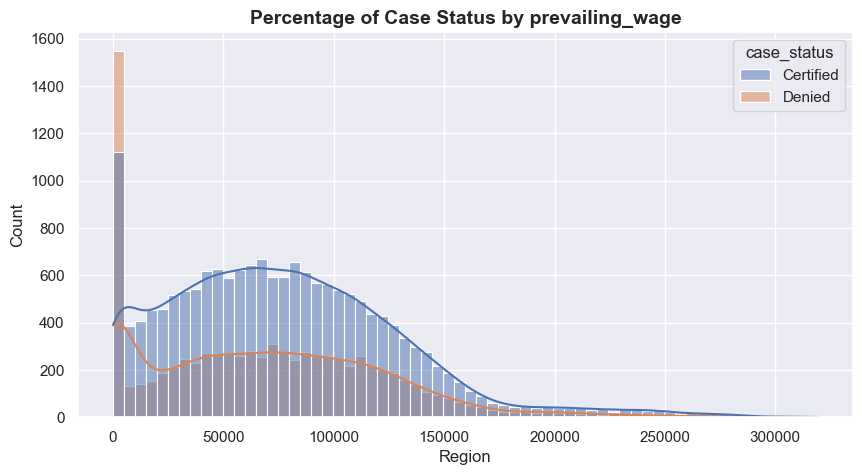

In [55]:

# Set figure size
sns.set(rc={'figure.figsize': (10, 5)})

# Bar plot for percentage of case_status by prevailing_wage
ax1 = sns.histplot(data=percentage, x='prevailing_wage', hue='case_status',kde=True)
plt.title('Percentage of Case Status by prevailing_wage', fontsize=14, fontweight='bold')
plt.xlabel("Region")
plt.ylabel("Count")

In [56]:
value = df.groupby('education_of_employee')['prevailing_wage'].mean().sort_values(ascending=False).to_frame()
value


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


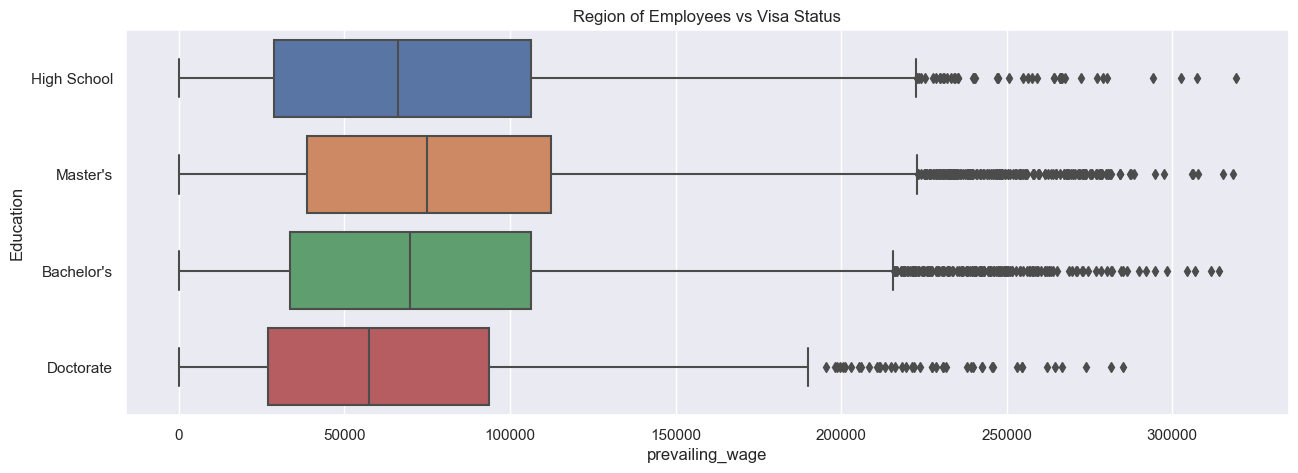

In [57]:
plt.figure(figsize=(15,5))
sns.boxplot(x='prevailing_wage',y='education_of_employee',data=df)
plt.title("Region of Employees vs Visa Status")
plt.ylabel("Education")
plt.xlabel("prevailing_wage")
plt.show()

In [58]:
df2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [59]:
value = df.groupby('has_job_experience')['prevailing_wage'].mean().sort_values(ascending=False).to_frame()
value


,prevailing_wage
has_job_experience,
N,75464.159920
Y,73728.405363


In [60]:
value = df.groupby('continent')['prevailing_wage'].mean().sort_values(ascending=False).to_frame()
value


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


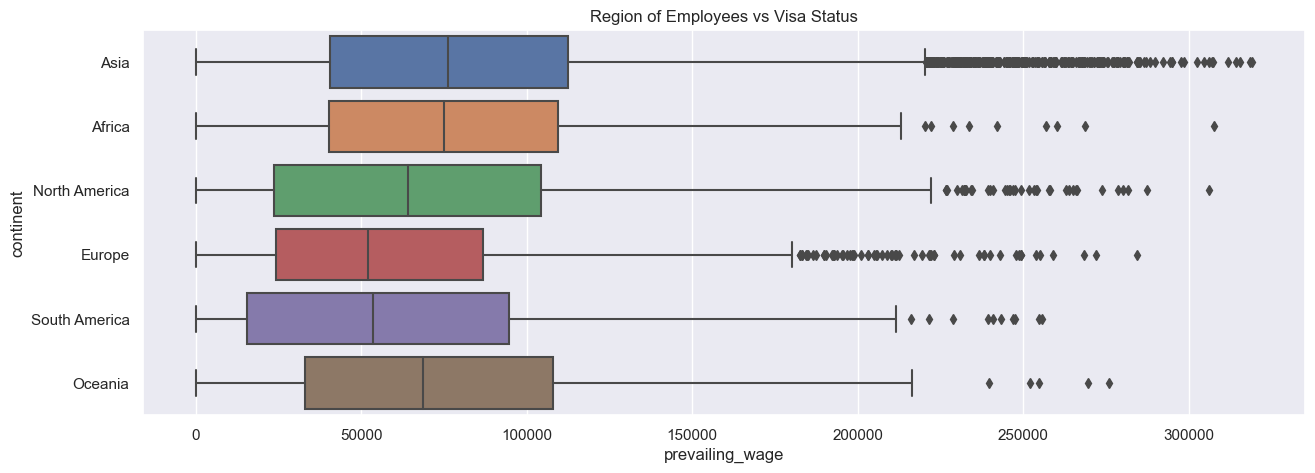

In [61]:
plt.figure(figsize=(15,5))
sns.boxplot(x='prevailing_wage',y='continent',data=df)
plt.title("Region of Employees vs Visa Status")
plt.ylabel("continent")
plt.xlabel("prevailing_wage")
plt.show()

In [62]:
df2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


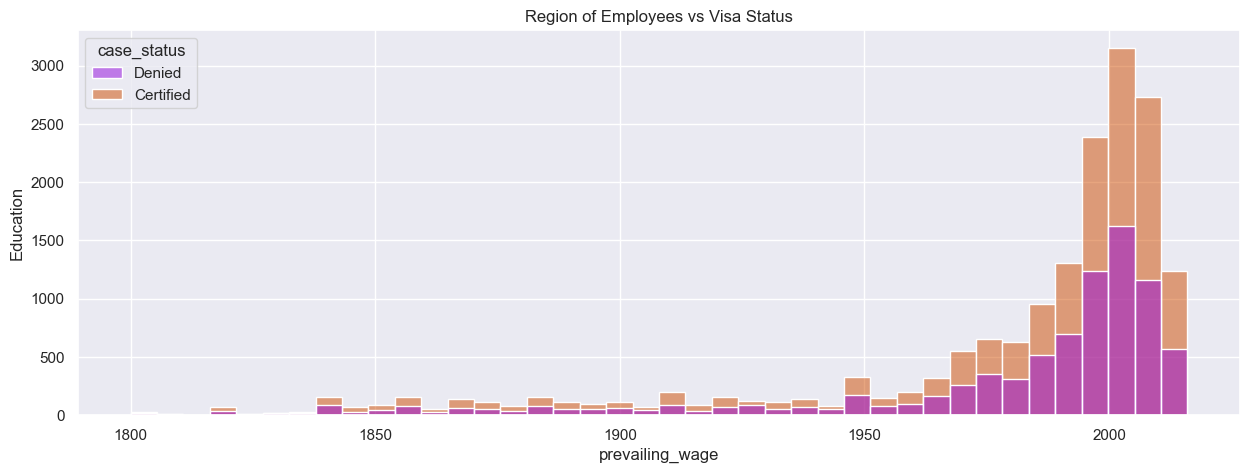

In [63]:
plt.figure(figsize=(15,5))
sns.histplot(x='yr_of_estab',hue='case_status',data=df,bins=40,palette='gnuplot')
plt.title("Region of Employees vs Visa Status")
plt.ylabel("Education")
plt.xlabel("prevailing_wage")
plt.show()

### Final Report 
#### Reuired_job_traning columns can be dropped as it doesn't have much impact to taget variable proved in visualization and ch2 test
#### no of Employee , prevailing wage : Columns have outlier which should be handled 
#### continent columns has few unique values with very less count which can be made as others
#### target column case_status a imbalanced can be handled before model building

# outliner handling

In [64]:
# droping the unnesessory columns
